In [104]:
pip install tcrdist3==0.2.2

Note: you may need to restart the kernel to use updated packages.


In [105]:
from tcrsampler.setup_db import install_all_next_gen
install_all_next_gen(dry_run = False)

RUNNING: curl -o /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wiraninha_sampler.zip https://www.dropbox.com/s/ily0td3tn1uc7bi/wiraninha_sampler.zip?dl=1 -L


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    66    0    66    0     0    214      0 --:--:-- --:--:-- --:--:--   214
100   320  100   320    0     0    401      0 --:--:-- --:--:-- --:--:--   401
100 6882k  100 6882k    0     0  2591k      0  0:00:02  0:00:02 --:--:-- 10.7M


Archive:  /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wiraninha_sampler.zip
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wirasinha_mouse_alpha_g8a.tsv.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wirasinha_mouse_alpha_s_4.tsv.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wirasinha_mouse_alpha_s_8.tsv.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wirasinha_mouse_alpha_s_r.tsv.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wirasinha_mouse_alpha_t_1.tsv.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wirasinha_mouse_alpha_t_4.tsv.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/wirasinha_mouse_alpha_t_8.tsv.sampler

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    64    0    64    0     0    214      0 --:--:-- --:--:-- --:--:--   214
100   320  100   320    0     0    405      0 --:--:-- --:--:-- --:--:--     0
100  313k  100  313k    0     0   269k      0  0:00:01  0:00:01 --:--:--  269k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Archive:  /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ravens_samplers.zip
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ravens_human_gamma_t.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ravens_human_delta_t.sampler.tsv  
RUNNING: curl -o /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/olga_sampler.zip https://www.dropbox.com/s/qlsxvst8bn04l0n/olga_sampler.zip?dl=1 -L


100    61    0    61    0     0    229      0 --:--:-- --:--:-- --:--:--   229
100   320  100   320    0     0    414      0 --:--:-- --:--:-- --:--:--   414
100 23.5M  100 23.5M    0     0  7242k      0  0:00:03  0:00:03 --:--:-- 14.3M


Archive:  /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/olga_sampler.zip
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/olga_human_beta_t.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/olga_mouse_beta_t.sampler.tsv  
  inflating: /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/olga_human_alpha_t.sampler.tsv  


/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/olga_human_alpha_t.sampler.tsv:  write error (disk full?).  Continue? (y/n/^C) 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

RUNNING: curl -o /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_mouse_sampler.zip https://www.dropbox.com/s/yz8v1c1gf2eyzxk/ruggiero_mouse_sampler.zip?dl=1 -L


100    71    0    71    0     0    240      0 --:--:-- --:--:-- --:--:--   240
100   320  100   320    0     0     78      0  0:00:04  0:00:04 --:--:--   115
  7  210k    7 15916    0     0   3000      0  0:01:11  0:00:05  0:01:06 1726k
curl: (23) Failure writing output to destination
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_mouse_sampler.zip or
        /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_mouse_sampler.zip.zip, and cannot find /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_mouse_sampler.zip.ZIP, period.
  % Total    % Received % Xferd  Average Speed   Time    Time     Tim

Archive:  /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_mouse_sampler.zip
RUNNING: curl -o /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_human_sampler.zip https://www.dropbox.com/s/jda6qtemk65zlfk/ruggiero_human_sampler.zip?dl=1 -L


100    71    0    71    0     0    239      0 --:--:-- --:--:-- --:--:--   239
100   320  100   320    0     0    414      0 --:--:-- --:--:-- --:--:--   414
  7  599k    7 48665    0     0  38737      0  0:00:15  0:00:01  0:00:14  651k
curl: (23) Failure writing output to destination
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_human_sampler.zip or
        /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_human_sampler.zip.zip, and cannot find /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_human_sampler.zip.ZIP, period.
  % Total    % Received % Xferd  Average Speed   Time    Time     Tim

Archive:  /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/ruggiero_human_sampler.zip
RUNNING: curl -o /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip https://www.dropbox.com/s/04mxrzw7f5wkg1x/emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip?dl=1 -L


100    92    0    92    0     0    275      0 --:--:-- --:--:-- --:--:--   275
100   320  100   320    0     0    396      0 --:--:-- --:--:-- --:--:--   396
  0 11.3M    0 81902    0     0  43134      0  0:04:35  0:00:01  0:04:34 77485
curl: (23) Failure writing output to destination
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip or
        /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip.zip, and cannot find /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip.ZIP, period.
  % To

Archive:  /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip
RUNNING: curl -o /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/britanova_human_beta_t_cb.tsv.sampler.tsv.zip https://www.dropbox.com/s/87n5v2by80xhy1q/britanova_human_beta_t_cb.tsv.sampler.tsv.zip?dl=1 -L


100    90    0    90    0     0    267      0 --:--:-- --:--:-- --:--:--   267
100   320  100   320    0     0    436      0 --:--:-- --:--:-- --:--:--   436
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Archive:  /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/britanova_human_beta_t_cb.tsv.sampler.tsv.zip


  0 28.3M    0 16375    0     0   8461      0  0:58:37  0:00:01  0:58:36 16709
curl: (23) Failure writing output to destination
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/britanova_human_beta_t_cb.tsv.sampler.tsv.zip or
        /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/britanova_human_beta_t_cb.tsv.sampler.tsv.zip.zip, and cannot find /Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrsampler/db/britanova_human_beta_t_cb.tsv.sampler.tsv.zip.ZIP, period.


In [54]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import multiprocessing
import pwseqdist as pw
from tcrdist.rep_funcs import _pws, _pw  
from tcrdist.repertoire import TCRrep
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances


file_path = "/Users/tomelder/Downloads/vdjdb-2023-06-01/vdjdb.txt"
path2 =  "/Users/tomelder/Downloads/vdjdb-2023-06-01/vdjdb_full.txt"



# Read the tab-separated text file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t')
df = df[(df['vdjdb.score'] == 2) | (df['vdjdb.score'] == 3) | (df['vdjdb.score'] == 4)]
df

df_full = pd.read_csv(path2, delimiter='\t')
df_full = df_full[(df_full['vdjdb.score'] == 2) | (df_full['vdjdb.score'] == 3) | (df_full['vdjdb.score'] == 4)  | (df_full['vdjdb.score'] == 1) ]
df_full['count']= 1
df_full 

/var/folders/dg/1nsyrpm96v149hfhy4g6qc0h0000gn/T/ipykernel_8240/318472597.py:28: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(path2, delimiter='\t')
/var/folders/dg/1nsyrpm96v149hfhy4g6qc0h0000gn/T/ipykernel_8240/318472597.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['count']= 1


,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score,count
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,1
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,NaN,"{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,1
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,1
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,1
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62132,CIALNARLMF,TRAV26-1*01,TRAJ31*01,CASSLRATDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CIALNARLMF"", ""cdr3_old"": ""CIALNARLMF...","{""cdr3"": ""CASSLRATDTQYF"", ""cdr3_old"": ""CASSLRA...",2,1
62133,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,CATSRAGGGGEKLFF,TRBV15*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CAMREGRYSSASKIIF"", ""cdr3_old"": ""CAMR...","{""cdr3"": ""CATSRAGGGGEKLFF"", ""cdr3_old"": ""CATSR...",2,1
62134,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,CASSQGSGGNEQFF,TRBV4-3*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CLVGDGDGGATNKLIF"", ""cdr3_old"": ""CLVG...","{""cdr3"": ""CASSQGSGGNEQFF"", ""cdr3_old"": ""CASSQG...",2,1
62136,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,CASSIVGSGGYNEQFF,TRBV19*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CAASVLYGSSNTGKLIF"", ""cdr3_old"": ""CAA...","{""cdr3"": ""CASSIVGSGGYNEQFF"", ""cdr3_old"": ""CASS...",2,1


In [82]:
df_slim = df.iloc[:,[0,1,2,3,4,5, 6,7, 8, 9, 10,11]]
df_slim

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
...,...,...,...,...,...,...,...,...,...,...,...,...
92686,30552,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,FPQPEQPFPWQP,Gluten,Wheat
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,Gluten,Wheat
92690,30554,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,Gluten,Wheat
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat


Drop duplicates

In [83]:
# Drop duplicate rows based on all columns
df_slim_no_duplicates = df_slim.drop_duplicates()
df_slim_no_duplicates

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1
...,...,...,...,...,...,...,...,...,...,...,...,...
92686,30552,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,FPQPEQPFPWQP,Gluten,Wheat
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,Gluten,Wheat
92690,30554,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,Gluten,Wheat
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat


Filter into beta and alpha chains 

In [84]:
df_beta = df_slim_no_duplicates[df_slim_no_duplicates['gene'] == 'TRB']
df_alpha = df_slim_no_duplicates[df_slim_no_duplicates['gene'] == 'TRA']

Investigating the most frequent cdr3 sequence in our beta dataset

In [85]:
df_beta[df_beta['cdr3'] == 'CATRIGWGTDTQYF']

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species
5186,389,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5194,393,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5196,394,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5198,395,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5200,396,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5204,398,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5206,399,TRB,CATRIGWGTDTQYF,TRBV5-5*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5208,400,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5212,402,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2
5214,403,TRB,CATRIGWGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2


In [86]:
df_alpha[df_alpha['complex.id'] == 389]

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species
5185,389,TRA,CLVGSVGAGSYQLTF,TRAV4*01,TRAJ28*01,HomoSapiens,HLA-B*07:02,B2M,MHCI,RPRGEVRFL,UL49,HSV-2


In [87]:
# Replace 'cdr3' with the actual column name
cdr3_counts = df_alpha['cdr3'].value_counts()

# Create a DataFrame from the value counts
df_cdr3_counts = pd.DataFrame({'cdr3': cdr3_counts.index, 'count': cdr3_counts.values})

# Display the table sorted by count in descending order
df_cdr3_counts = df_cdr3_counts.sort_values(by='count', ascending=False)
print(df_cdr3_counts.head(20))  # Displaying the top 10 most frequent values

                cdr3  count
0        CARNTGNQFYF     22
1   CALSEARGGATNKLIF     16
2     CALSGFYNTDKLIF     15
3      CAVTTDSWGKLQF     13
4    CAVRDTNTNAGKSTF     12
5    CALSSRGSTLGRLYF     12
6      CAMRGDSSYKLIF      9
7       CAFKAAGNKLTF      9
8       CAVNFGGGKLIF      9
9   CILPLAGGTSYGKLTF      9
10      CAGAGSQGNLIF      8
11    CAVSAKGTGSKLSF      8
12   CAGQNYGGSQGNLIF      7
13   CAVRPTSGGSYIPTF      7
16    CALNPFNAGNMLTF      6
17      CAEGDSWGKLQF      6
15   CAVQDLGTSGSRLTF      6
14      CAALYGNEKITF      6
22    CALSEADSWGKLQF      5
26      CAFGRGAQKLVF      5


# TCRDist, using only cdr3 seq

The following code allows us to use our own variable names 

Gap penalty introduced to capture variation in length

similarity-weighted Hamming distance. Hamming distance is usually used for binary sequences. 

In [96]:
def cdr3plot(df_):
    
    # Choose the metrics you want to apply to each CDR
    metrics = { 'cdr3' : pw.metrics.nb_vector_tcrdist}

    # Choose the weights that are right for you.
    weights = { 'cdr3' : 1}

    # Provide arguments for the distance metrics 
    kargs = {   'cdr3' : {'use_numba': True, 'distance_matrix': pw.matrices.tcr_nb_distance_matrix, 'dist_weight': 1, 'gap_penalty':4, 'ntrim':3, 'ctrim':2, 'fixed_gappos':False}}


    dmats = _pws(df = df_,
             metrics = metrics, 
             weights= weights, 
             kargs=kargs, 
             cpu = 1, 
             store = True)

    print(type(dmats['tcrdist']))

    # Assuming 'tcrdist' is your computed distance matrix
    tcrdist_matrix = dmats['tcrdist']

    df_plot_beta = df_.copy()

    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tcrdist_matrix)
    df_plot_beta['pca1'] = pca_result[:, 0]
    df_plot_beta['pca2'] = pca_result[:, 1]

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(tcrdist_matrix)
    df_plot_beta['tsne1'] = tsne_result[:, 0]
    df_plot_beta['tsne2'] = tsne_result[:, 1]

    # UMAP
    umap = UMAP(n_components=2)
    umap_result = umap.fit_transform(tcrdist_matrix)
    df_plot_beta['umap1'] = umap_result[:, 0]
    df_plot_beta['umap2'] = umap_result[:, 1]


    unique_species = df_plot_beta['antigen.epitope'].unique()

    # Create a color palette with a unique color for each species
    palette = sns.color_palette("husl", n_colors=len(unique_species))

    # Map each species to its corresponding color in the DataFrame
    species_color_mapping = dict(zip(unique_species, palette))
    df_plot_beta['color'] = df_plot_beta['antigen.epitope'].map(species_color_mapping)

    # Increase the size of the entire figure
    plt.figure(figsize=(18, 6))

    # PCA plot
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='pca1', y='pca2', hue='antigen.epitope', palette=species_color_mapping, data=df_plot_beta, s=5)  # Adjust 's' parameter
    plt.title('PCA')
    plt.legend(title='Antigen Epitope', bbox_to_anchor=(0.5, -0.2))

    # t-SNE plot
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='tsne1', y='tsne2', hue='antigen.epitope', palette=species_color_mapping, data=df_plot_beta, s=5)  # Adjust 's' parameter
    plt.title('t-SNE')
    plt.legend(title='Antigen Epitope', bbox_to_anchor=(0.5, -0.2))

    # UMAP plot
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='umap1', y='umap2', hue='antigen.epitope', palette=species_color_mapping, data=df_plot_beta, s=5)  # Adjust 's' parameter
    plt.title('UMAP')
    plt.legend(title='Antigen Epitope', bbox_to_anchor=(0.5, -0.2))

    plt.show()
    return

In [97]:
"""
All of the beta cdr3 sequences clustered based only on sequence
"""

cdr3plot(df_beta)

<class 'numpy.ndarray'>


KeyboardInterrupt: 

Clearly too many data points and epitopes for this graph to give useful information. We can investigate the make up of our data set

In [72]:
cdr3_counts = df_beta['antigen.gene'].value_counts()

# Create a DataFrame from the value counts
df_cdr3_counts = pd.DataFrame({'epitope': cdr3_counts.index, 'count': cdr3_counts.values})

# Display the table sorted by count in descending order
df_cdr3_counts = df_cdr3_counts.sort_values(by='count', ascending=False)
print(df_cdr3_counts.head(20))  # Displaying the top 10 most frequent values

      epitope  count
0        pp65    519
1       MLANA    185
2       BZLF1    136
3      Gluten    126
4       BMLF1     91
5       Spike     90
6           M     85
7         NS3     79
8        UL49     68
9           N     49
10      BRLF1     48
11   NY-ESO-1     46
12  synthetic     38
13     EBNA3A     37
14        Gag     33
15       IE-1     31
16       KRAS     30
17        Nef     22
18      SF3B1     21
19         HA     16


The pp65 epitope is the most dominant in the data set, making up nearly a quarter of the inputs. 

In [70]:
df_beta_pp65 = df_beta[df_beta['antigen.gene'] == 'pp65']
cdr3_counts = df_beta_pp65['cdr3'].value_counts()

# Create a DataFrame from the value counts
df_cdr3_counts = pd.DataFrame({'cdr3': cdr3_counts.index, 'count': cdr3_counts.values})

# Display the table sorted by count in descending order
df_cdr3_counts = df_cdr3_counts.sort_values(by='count', ascending=False)
print(df_cdr3_counts.head(20))  # Displaying the top 10 most frequent values

                cdr3  count
0      CASSFQGYTEAFF      6
1       CASSSAYYGYTF      6
2      CASSSGGLSEQYF      4
3   CASSLAPGTTNEKLFF      4
4   CASSPQTGTGTYGYTF      4
5    CASSPKTGASYGYTF      4
15  CASSETGATNYGYTGF      3
23     CASSFVSFDEQFF      3
22      CASSLWLNEQFF      3
21      CASSSANYGYTF      3
20   CASSLRGQGFYEQFF      3
18       CASSSVTEAFF      3
17   CASSAQTGAAYGYTF      3
16    CSVDPGHTGEKLFF      3
19   CASSADSYGANVLTF      3
14   CASSPSTGTIYGYTF      3
12   CASSSFYDSNEKLFF      3
11  CASSPVTGGIYGYTGF      3
10    CASRRQGTVYEQYF      3
9      CASSLEGYTEAFF      3


This shows that there are some duplicate cdr3 values in the data set that correspond to the same epitope. Are there any identical cdr3 that bond to different epitopes

[[ 0 16 32 ... 28 31 36]
 [16  0 32 ... 32 35 32]
 [32 32  0 ... 40 40 32]
 ...
 [28 32 40 ...  0  6 28]
 [31 35 40 ...  6  0 28]
 [36 32 32 ... 28 28  0]]


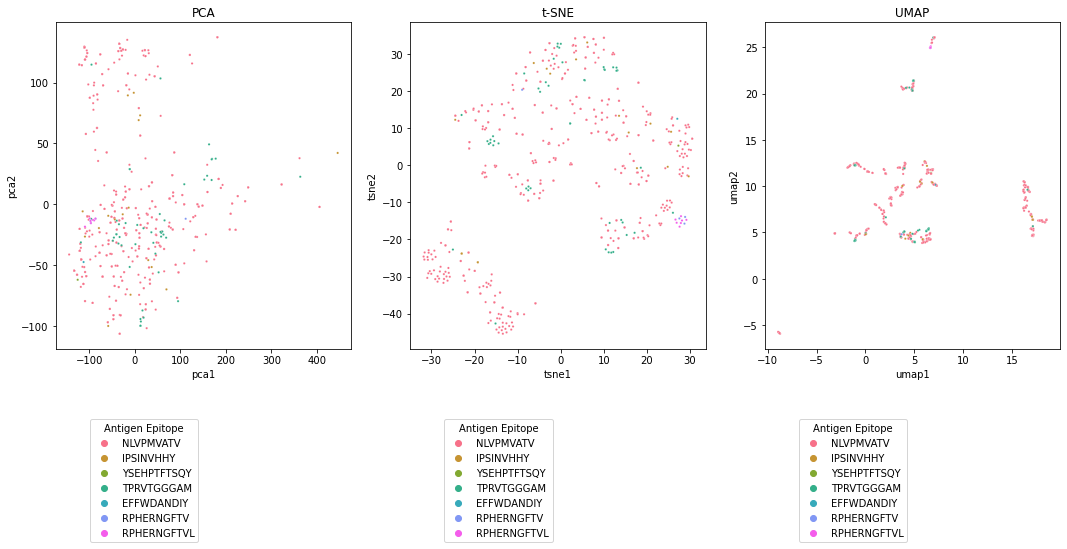

In [87]:
pp65 = df_beta[df_beta['antigen.gene'] == 'pp65']
cdr3plot(pp65)

This spread shows very poor clustering, considering only one gene is plotted. These should be members of one cluster. The different epitope colors are colored in, showing some clustering. The vdjdb github displays a graph of cluster epitopes,NLVPMVATV, being nicely clustered. This is not acheived using TCRdist and only the CDR3 sequence

[[ 0 32 32 ... 30 39 30]
 [32  0  0 ... 23 24 16]
 [32  0  0 ... 23 24 16]
 ...
 [30 23 23 ...  0 23 13]
 [39 24 24 ... 23  0 20]
 [30 16 16 ... 13 20  0]]


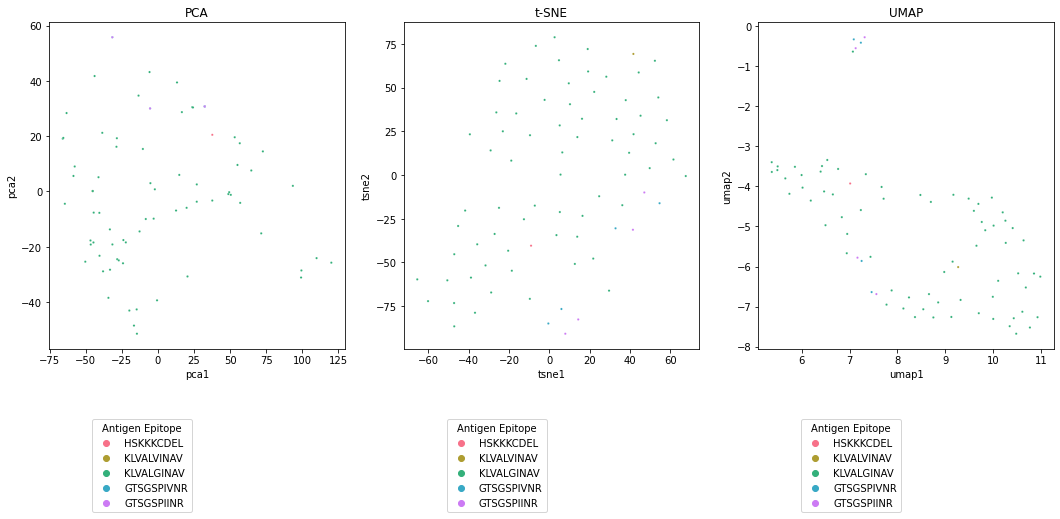

In [88]:
pp65 = df_beta[df_beta['antigen.gene'] == 'NS3']
cdr3plot(pp65)

So random, is the distance matrix relative to all the other points in the dataset ?

In [71]:
cdr3_counts = df_beta['cdr3'].value_counts()

# Create a DataFrame from the value counts
df_cdr3_counts = pd.DataFrame({'cdr3': cdr3_counts.index, 'count': cdr3_counts.values})

# Display the table sorted by count in descending order
df_cdr3_counts = df_cdr3_counts.sort_values(by='count', ascending=False)
print(df_cdr3_counts.head(20))  # Displaying the top 10 most frequent values

                   cdr3  count
0        CATRIGWGTDTQYF     13
2   CASSPSGLAGSNLGNEQFF     12
1      CASRPGLAGGRPEQYF     12
3        CASPGLAGEYEQYF     11
4         CASGDFWGDTLYF     11
5        CASSRDTVNTEAFF     10
6      CATSEAASSWTGELFF      9
7         CASSVWGTDTQYF      9
8      CASSLWEKLAKNIQYF      9
9         CASSIRSSYEQYF      9
11          CASGGGGTLYF      8
10         CASSDAPGQLYF      8
12       CASSYVGNTGELFF      7
13        CASSLGQAYEQYF      7
14        CSARDGTGNGYTF      7
20         CASSARSGELFF      6
24       CASSDAGGRNTLYF      6
23        CASSLSFGTEAFF      6
22       CASSRDFVSNEQYF      6
21        CSARVGDTGELFF      6


In [93]:
df_beta[df_beta['cdr3'] == 'CASSPSGLAGSNLGNEQFF']

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species
78122,27010,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,RMEQVDWTV,synthetic,synthetic
78124,27011,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,KLEFMDWRL,synthetic,synthetic
78126,27012,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,WLDNFELCL,synthetic,synthetic
78128,27013,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,TLEYMDWLV,synthetic,synthetic
78130,27014,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,EMMLFDWKV,synthetic,synthetic
78132,27015,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,KLEQLDWTV,GEMIN,HomoSapiens
78134,27016,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,TMETIDWKV,CD74,HomoSapiens
78136,27017,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,TLEELDWCL,PDE4A,HomoSapiens
78138,27018,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,LLEDLDWDV,WDR87,HomoSapiens
78140,27019,TRB,CASSPSGLAGSNLGNEQFF,TRBV11-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,VLEEVDWLI,FANCI,HomoSapiens


The above is a clear display for why the cdr3 sequence cannot be used in isolation, as they can correspond to different epitopes, making clustering impossible for a large dataset.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


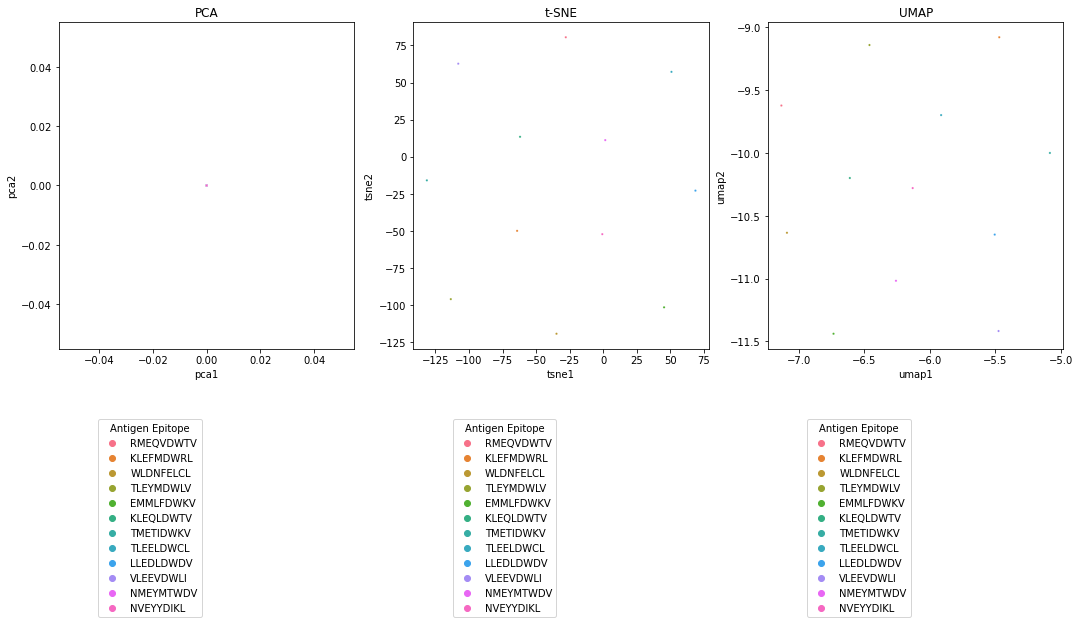

In [94]:
cdr = df_beta[df_beta['cdr3'] == 'CASSPSGLAGSNLGNEQFF']
cdr3plot(cdr)

TSNE and Umap require appropriate information for dimensionality reduction. 

[[ 0 29 26 ... 42 46 29]
 [29  0 31 ... 30 35 30]
 [26 31  0 ... 43 43 26]
 ...
 [42 30 43 ...  0 31 24]
 [46 35 43 ... 31  0 36]
 [29 30 26 ... 24 36  0]]


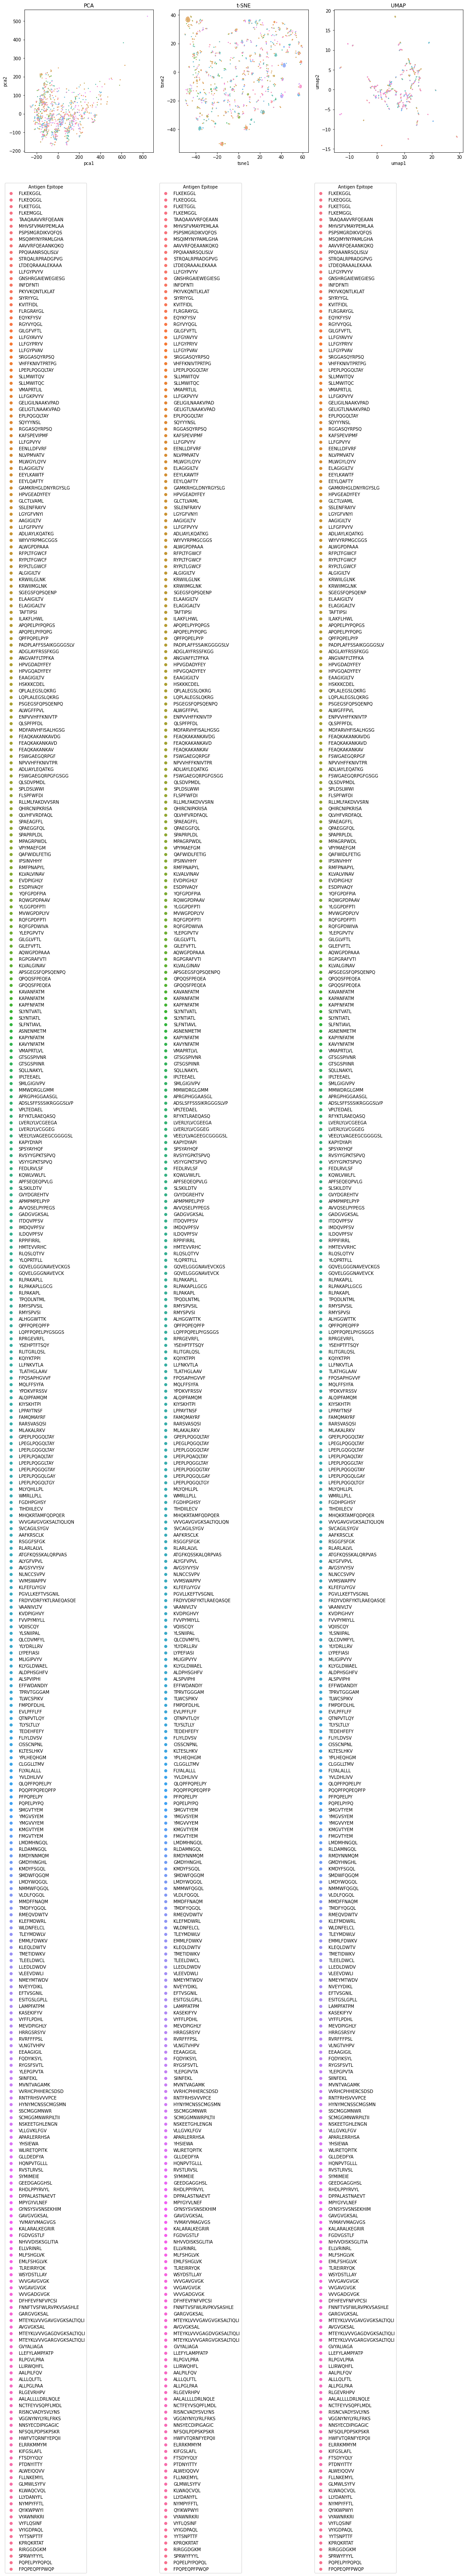

In [90]:
cdr3plot(df_alpha)

In [95]:
cdr3_counts = df_alpha['antigen.gene'].value_counts()

# Create a DataFrame from the value counts
df_cdr3_counts = pd.DataFrame({'epitope': cdr3_counts.index, 'count': cdr3_counts.values})

# Display the table sorted by count in descending order
df_cdr3_counts = df_cdr3_counts.sort_values(by='count', ascending=False)
print(df_cdr3_counts.head(20))  # Displaying the top 10 most frequent values

         epitope  count
0           pp65    399
1          Spike     90
2           UL49     68
3            NS3     66
4          MLANA     49
5         Gluten     47
6      synthetic     38
7       NY-ESO-1     38
8            Gag     33
9          BZLF1     33
10         BMLF1     32
11          KRAS     29
12         SF3B1     21
13        EBNA3A     19
14           Nef     18
15             M     16
16       SLC30A8     15
17  Nucleocapsid     14
18           Tax     13
21           p53     10


[[ 0  4 19 ... 16  0 27]
 [ 4  0 20 ... 16  4 27]
 [19 20  0 ... 23 19 24]
 ...
 [16 16 23 ...  0 16 28]
 [ 0  4 19 ... 16  0 27]
 [27 27 24 ... 28 27  0]]


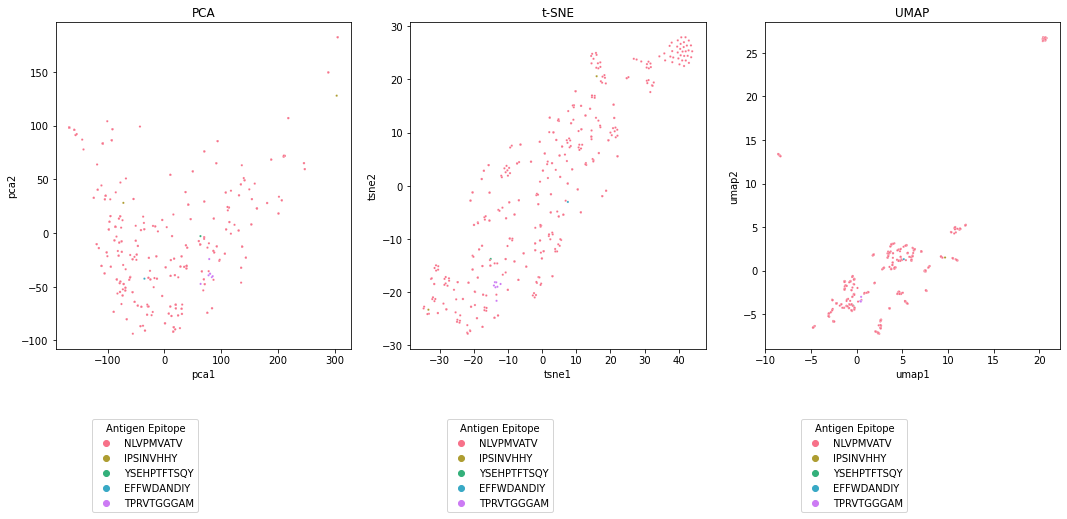

In [96]:
pp = df_alpha[df_alpha['antigen.gene'] == 'pp65']

cdr3plot(pp)

# More variables
#### We now would like to include more information about each T-cell in order to imporve the clustering 

The df_full has the data in a similar format used in TCRDist, allowing us to use the reference file used in TCRDist

In [29]:
df_full.rename(columns={'cdr3.alpha': 'cdr3_a_aa', 'cdr3.beta': 'cdr3_b_aa', 'v.alpha':'v_a_gene','j.alpha': 'j_a_gene','v.beta': 'v_b_gene','j.beta': 'j_b_gene','antigen.epitope':'epitope'}, inplace=True)

In [37]:
df_full_slim= df_full.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11, 34]]

df_homo = df_full_slim[df_full_slim['species'] == 'HomoSapiens']

df_homo['species'] = 'human'

df_homo



/var/folders/dg/1nsyrpm96v149hfhy4g6qc0h0000gn/T/ipykernel_8240/4118968455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_homo['species'] = 'human'


,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,d.beta,j_b_gene,species,mhc.a,mhc.b,mhc.class,epitope,count
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,human,HLA-B*08,B2M,MHCI,FLKEKGGL,1
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,human,HLA-B*08,B2M,MHCI,FLKEKGGL,1
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,human,HLA-B*08,B2M,MHCI,FLKEKGGL,1
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,human,HLA-B*08,B2M,MHCI,FLKEKGGL,1
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,human,HLA-B*08,B2M,MHCI,FLKEKGGL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62132,CIALNARLMF,TRAV26-1*01,TRAJ31*01,CASSLRATDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,human,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,1
62133,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,CATSRAGGGGEKLFF,TRBV15*01,NaN,TRBJ1-4*01,human,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,FPQPEQPFPWQP,1
62134,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,CASSQGSGGNEQFF,TRBV4-3*01,NaN,TRBJ2-1*01,human,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,FPQPEQPFPWQP,1
62136,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,CASSIVGSGGYNEQFF,TRBV19*01,NaN,TRBJ2-1*01,human,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,1


In [12]:
df_mouse = df_full_slim[df_full_slim['species'] == 'MusMusculus']

df_mouse['species'] = 'mouse'

df_mouse

/var/folders/dg/1nsyrpm96v149hfhy4g6qc0h0000gn/T/ipykernel_8240/544625506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['species'] = 'mouse'


,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,d.beta,j_b_gene,species,mhc.a,mhc.b,mhc.class,epitope
1165,CAATGSFNKLTF,TRAV14D-2*01,NaN,CASGGQGRAEQFF,TRBV13-2*01,NaN,TRBJ2-1*01,mouse,H-2Aa,H-2Aa,MHCII,GNSHRGAIEWEGIESG
1166,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,CTCSADRVGNTLYF,TRBV1*01,NaN,TRBJ1-3*01,mouse,H-2Kb,B2M,MHCI,INFDFNTI
1168,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,CASGGGGTLYF,TRBV13-2*01,NaN,TRBJ2-4*01,mouse,H-2Kb,B2M,MHCI,SIYRYYGL
1170,CAARYQGGRALIF,TRAV14-1*01,TRAJ15*01,CTCSAAPDWGASAETLYF,TRBV1*01,NaN,TRBJ2-3*01,mouse,H-2Kb,B2M,MHCI,KVITFIDL
1172,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,CASGGGGTLYF,TRBV13-2*01,NaN,TRBJ2-4*01,mouse,H-2Kb,B2M,MHCI,EQYKFYSV
...,...,...,...,...,...,...,...,...,...,...,...,...
52903,CAASDDNRIFF,TRAV14-1*01,TRAJ31*01,CASSRANYEQYF,TRBV12-1*01,TRBD2,TRBJ2-7*01,mouse,H-2KB,B2M,MHCI,SIINFEKL
53428,CAAGDSGGSNYKLTF,TRAV19*01,TRAJ53*01,CASASWGGYAEQFF,TRBV13-1*02,NaN,TRBJ2-1*01,mouse,HLA-A*11:01,B2M,MHCI,VVVGAVGVGK
53429,CAVSGGTNSAGNKLTF,TRAV3-3*01,TRAJ17*01,CASSRDWGPAEQFF,TRBV4*01,NaN,TRBJ2-1*01,mouse,HLA-A*11:01,B2M,MHCI,VVGAVGVGK
53430,NaN,NaN,NaN,CTCSADRGAETLYF,TRBV1*01,NaN,TRBJ2-3*01,mouse,HLA-A*11:01,B2M,MHCI,VVVGAVGVGK


In [9]:
df_full_slim['species'].unique()

array(['HomoSapiens', 'MusMusculus'], dtype=object)

In [40]:


tr = TCRrep(
                cell_df = df_homo, 
                organism = 'human', 
                chains = ['alpha','beta'], 
                db_file = 'alphabeta_gammadelta_db.tsv',
                clone_df          = None,
                imgt_aligned      = True,
                infer_all_genes   = True,
                infer_cdrs        = True,
                infer_index_cols  = True,
                deduplicate       = True,
                use_defaults      = True,
                store_all_cdr     = True,
                compute_distances = True,
                index_cols        = None,
                cpus              = 1)

/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: nan gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:504: UserWarning: nan gene was not recognized in reference db no cdr seq could be inferred
  f1 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:508: UserWarning: nan gene was not recognized in reference db no cdr seq could be inferred
  f2 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: nan gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repert

In [111]:
import pwseqdist as pw

print(np.shape(tr.pw_beta))
print(np.shape(tr.pw_alpha))

(37, 37)
(37, 37)


/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


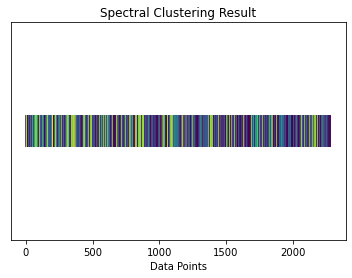

In [39]:
# # Convert distance matrix to affinity matrix
# affinity_matrix = np.exp(-tcrdist_matrix / tcrdist_matrix.std())

# # Number of clusters (you can adjust this based on your data)
# n_clusters = 30

# # Apply spectral clustering
# spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
# labels = spectral.fit_predict(affinity_matrix)

# # Plot the points with colors representing clusters
# plt.scatter(range(len(labels)), [0] * len(labels), c=labels, cmap='viridis', marker='|', s=1000)
# plt.title('Spectral Clustering Result')
# plt.xlabel('Data Points')
# plt.yticks([])
# plt.show()

In [47]:
df_full

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score,count
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,1
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,NaN,"{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,1
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,1
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,1
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62132,CIALNARLMF,TRAV26-1*01,TRAJ31*01,CASSLRATDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CIALNARLMF"", ""cdr3_old"": ""CIALNARLMF...","{""cdr3"": ""CASSLRATDTQYF"", ""cdr3_old"": ""CASSLRA...",2,1
62133,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,CATSRAGGGGEKLFF,TRBV15*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CAMREGRYSSASKIIF"", ""cdr3_old"": ""CAMR...","{""cdr3"": ""CATSRAGGGGEKLFF"", ""cdr3_old"": ""CATSR...",2,1
62134,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,CASSQGSGGNEQFF,TRBV4-3*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CLVGDGDGGATNKLIF"", ""cdr3_old"": ""CLVG...","{""cdr3"": ""CASSQGSGGNEQFF"", ""cdr3_old"": ""CASSQG...",2,1
62136,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,CASSIVGSGGYNEQFF,TRBV19*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,...,NaN,NaN,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CAASVLYGSSNTGKLIF"", ""cdr3_old"": ""CAA...","{""cdr3"": ""CASSIVGSGGYNEQFF"", ""cdr3_old"": ""CASS...",2,1


In [102]:
df_vdj= df_full.iloc[:,[3,4,6,7,8,9,10,11,13,33]]

df_vdj.rename(columns={'cdr3.beta': 'cdr3_b_aa','v.beta': 'v_b_gene','j.beta': 'j_b_gene','antigen.epitope':'epitope', 'mhc.a':'mhc_a', 'mhc.b':'mhc_b', 'mhc.class':'mhc_class', 'vdjdb.score':'score', 'antigen.species':'epitope_species'}, inplace=True)
df_vdj_human = df_vdj[df_vdj['species'] == 'HomoSapiens']
# df_homo = df_vdj[df_full_slim['species'] == 'HomoSapiens']
df_vdj_human

print(np.shape(df_vdj_human))

(7542, 10)


/var/folders/dg/1nsyrpm96v149hfhy4g6qc0h0000gn/T/ipykernel_8240/3532645957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vdj.rename(columns={'cdr3.beta': 'cdr3_b_aa','v.beta': 'v_b_gene','j.beta': 'j_b_gene','antigen.epitope':'epitope', 'mhc.a':'mhc_a', 'mhc.b':'mhc_b', 'mhc.class':'mhc_class', 'vdjdb.score':'score', 'antigen.species':'epitope_species'}, inplace=True)


In [98]:
def cdr3plot2(df_):
    tr_vdjdb = TCRrep(cell_df = df_vdj_human, 
    organism = 'human',
    chains = ['beta'],
    deduplicate = True,
    compute_distances = True)
    
    


    # Assuming 'tcrdist' is your computed distance matrix
    tcrdist_matrix = tr_vdjdb.pw_cdr3_b_aa
    
    print(tcrdist_matrix)

    df_plot_beta = df_full.copy()

    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tcrdist_matrix)
    df_plot_beta['pca1'] = pca_result[:, 0]
    df_plot_beta['pca2'] = pca_result[:, 1]

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(tcrdist_matrix)
    df_plot_beta['tsne1'] = tsne_result[:, 0]
    df_plot_beta['tsne2'] = tsne_result[:, 1]

    # UMAP
    umap = UMAP(n_components=2)
    umap_result = umap.fit_transform(tcrdist_matrix)
    df_plot_beta['umap1'] = umap_result[:, 0]
    df_plot_beta['umap2'] = umap_result[:, 1]


    unique_species = df_plot_beta['antigen.epitope'].unique()

    # Create a color palette with a unique color for each species
    palette = sns.color_palette("husl", n_colors=len(unique_species))

    # Map each species to its corresponding color in the DataFrame
    species_color_mapping = dict(zip(unique_species, palette))
    df_plot_beta['color'] = df_plot_beta['antigen.epitope'].map(species_color_mapping)

    # Increase the size of the entire figure
    plt.figure(figsize=(18, 6))

    # PCA plot
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='pca1', y='pca2', hue='antigen.epitope', palette=species_color_mapping, data=df_plot_beta, s=5)  # Adjust 's' parameter
    plt.title('PCA')
    plt.legend(title='Antigen Epitope', bbox_to_anchor=(0.5, -0.2))

    # t-SNE plot
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='tsne1', y='tsne2', hue='antigen.epitope', palette=species_color_mapping, data=df_plot_beta, s=5)  # Adjust 's' parameter
    plt.title('t-SNE')
    plt.legend(title='Antigen Epitope', bbox_to_anchor=(0.5, -0.2))

    # UMAP plot
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='umap1', y='umap2', hue='antigen.epitope', palette=species_color_mapping, data=df_plot_beta, s=5)  # Adjust 's' parameter
    plt.title('UMAP')
    plt.legend(title='Antigen Epitope', bbox_to_anchor=(0.5, -0.2))

    plt.show()
    return

In [101]:
tr_vdjdb = TCRrep(cell_df = df_vdj_human, 
organism = 'human',
chains = ['beta'],
deduplicate = True,
compute_distances = True)



/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: nan gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRBV13S1 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRBV7-9 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRBV2 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcr

()


In [106]:
TCRrep._show_incomplete()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


AttributeError: type object 'TCRrep' has no attribute '_show_incomplete'

In [93]:
print(type(tr_vdjdb.pw_cdr3_b_aa.values()))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [99]:
cdr3plot2(tr_vdjdb.pw_cdr3_b_aa)

/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: nan gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRBV13S1 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRBV7-9 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRBV2 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/Users/tomelder/opt/anaconda3/lib/python3.9/site-packages/tcr

[[ 0 38 36 ... 40 34 33]
 [38  0 23 ... 40 32 36]
 [36 23  0 ... 52 36 26]
 ...
 [40 40 52 ...  0 35 47]
 [34 32 36 ... 35  0 32]
 [33 36 26 ... 47 32  0]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [100]:
import numpy as np

# Assuming tr_vdjdb is your TCRrep object
# Access the pw_cdr3_b_aa array
pw_cdr3_b_aa = tr_vdjdb.pw_cdr3_b_aa

# Check for non-integer values
non_integer_values = pw_cdr3_b_aa[~np.isnan(pw_cdr3_b_aa) & (pw_cdr3_b_aa % 1 != 0)]

# Print the non-integer values, if any
if len(non_integer_values) > 0:
    print("Non-integer values found in pw_cdr3_b_aa:")
    print(non_integer_values)
else:
    print("No non-integer values found in pw_cdr3_b_aa.")


No non-integer values found in pw_cdr3_b_aa.
